# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Surya Yusuf Nugroho]
- **Email:** [suryanugroho042@gmail.com]
- **ID Dicoding:** [suryayyyy]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah perjalanan bike-sharing dalam beberapa tahun terakhir?
- Bagaimana pola penggunaan bike-sharing berdasarkan waktu dalam sehari?
- Musim apa yang memiliki jumlah perjalanan bike-sharing tertinggi?
- Bagaimana pola penggunaan bike-sharing berdasarkan hari dalam seminggu?
- Apakah ada korelasi antara suhu dengan kondisi ketika penggunaan bike-sharing tinggi?
- Apakah cuaca memengaruhi penggunaan bike-sharing?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

## Data Wrangling

### Gathering Data

In [5]:
# Menampilkan 5 baris
df = pd.read_csv("/content/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- instant: indeks rekaman
- dteday: tanggal
- season: musim (1: musim dingin, 2: musim semi, 3: musim panas, 4: musim gugur)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23)
- holiday: apakah hari tersebut adalah hari libur atau tidak (diambil dari situs resmi)
- weekday: hari dalam seminggu
- workingday: jika hari tersebut bukan akhir pekan atau hari libur maka 1, jika tidak maka 0
- weathersit:
  -  1: Cerah, Sedikit berawan, Sebagian berawan
  - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
  - 3: Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar
  - 4: Hujan deras + Es + Petir + Kabut, Salju + Kabut
- temp: Suhu yang dinormalisasi dalam Celsius (dibagi dengan 41 sebagai nilai maksimum)
- atemp: Suhu terasa yang dinormalisasi dalam Celsius (dibagi dengan 50 sebagai nilai maksimum)
- hum: Kelembaban yang dinormalisasi (dibagi dengan 100 sebagai nilai maksimum)
- windspeed: Kecepatan angin yang dinormalisasi dalam mil per jam (dibagi dengan 67 sebagai nilai maksimum)
- casual: jumlah perjalanan pengguna kasual
- registered: jumlah perjalanan pengguna terdaftar
- cnt: jumlah total penyewaan sepeda termasuk pengguna kasual dan terdaftar

### Assessing Data

In [6]:
# Menampilkan informasi data type, nilai null, jumlah kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Kita akan mengonversi variabel dteday ke dalam tipe data date.
- Variabel season, weekday, dan mnth direpresentasikan dalam bentuk bilangan bulat, kita akan mengubahnya menjadi nilai string yang sesuai.
- Variabel yr direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya ke dalam nilai tahun yang sesuai.








### Cleaning Data

In [8]:
# Mengecek missing values
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

**Insight:**
Tidak ada missing values dan duplikat di dalam Dataset

In [12]:
# Cek ringkasan statistik
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [14]:
# Cek jumlah baris dan kolom
print(df.shape)

(17379, 17)


In [15]:
# Konversi dteday ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [16]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# Mencari hari dalam seminggu dari setiap tanggal yang sesuai
df['weekday'] = df['dteday'].dt.day_name()

In [18]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Mencari bulan dari setiap tanggal yang sesuai
df['mnth'] = df['dteday'].dt.month_name()

In [20]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
# Mengganti nilai bilangan bulat pada season dengan musim yang sesuai
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)

df['season'] = season_list

In [22]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
# Mengembalikan nilai year
df['yr'] = df['dteday'].dt.year

In [28]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
# Mengembalikan nilai temp, atemp, hum, dan windspeed ke sebelum dinormalisasi
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

In [31]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,403.44,719.75,8100.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,369.82,681.75,8000.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,369.82,681.75,8000.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,403.44,719.75,7500.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,403.44,719.75,7500.0,0.0,0,1,1


In [33]:
# Menyimpan dataset yang sudah dibersihkan
df.to_csv("cleaned_bikeshare_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [36]:
# Mengecek tipe data
df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


In [37]:
# ekstrak 4 float variabel
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.00000,17379.000000,17379.000000,17379.000000
mean,835.43543,1189.437755,6272.288394,853.348155
std,323.68684,429.625539,1929.298341,549.185286
min,33.62000,0.000000,0.000000,0.000000
25%,571.54000,833.250000,4800.000000,469.100500
50%,840.50000,1212.000000,6300.000000,870.866000
75%,1109.46000,1553.000000,7800.000000,1138.859300
max,1681.00000,2500.000000,10000.000000,3818.792300


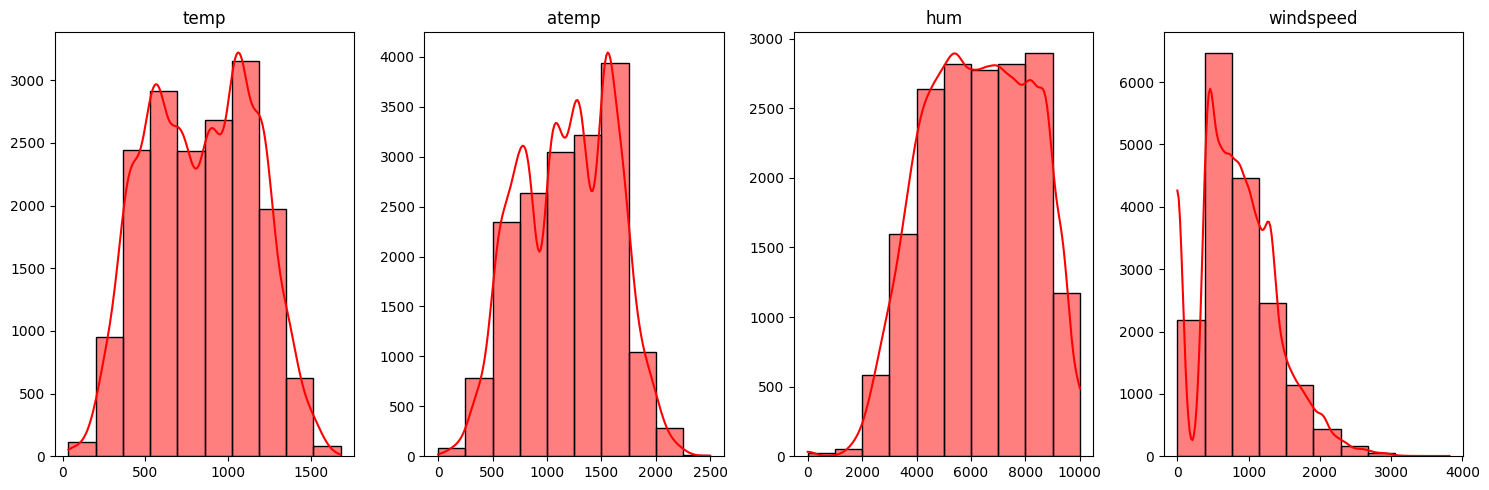

In [38]:
# Membuat figure dengan 4 subplot dalam satu baris
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Iterasi untuk membuat histogram pada setiap subplot
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='red')

    # Set judul dan hapus label sumbu x dan y untuk tampilan lebih bersih
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

# Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.tight_layout()

plt.show()

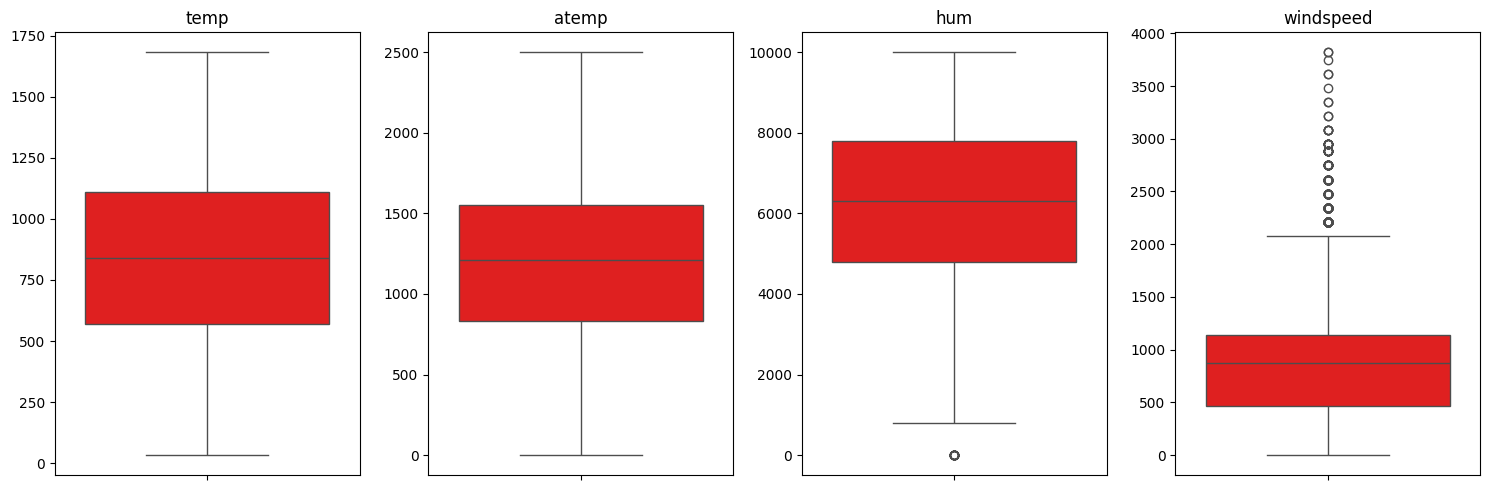

In [39]:
# Membuat figure dengan 4 subplot dalam satu baris
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterasi untuk membuat boxplot pada setiap subplot
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='red')

    # Set judul dan label
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.tight_layout()

# Show the plot
plt.show()

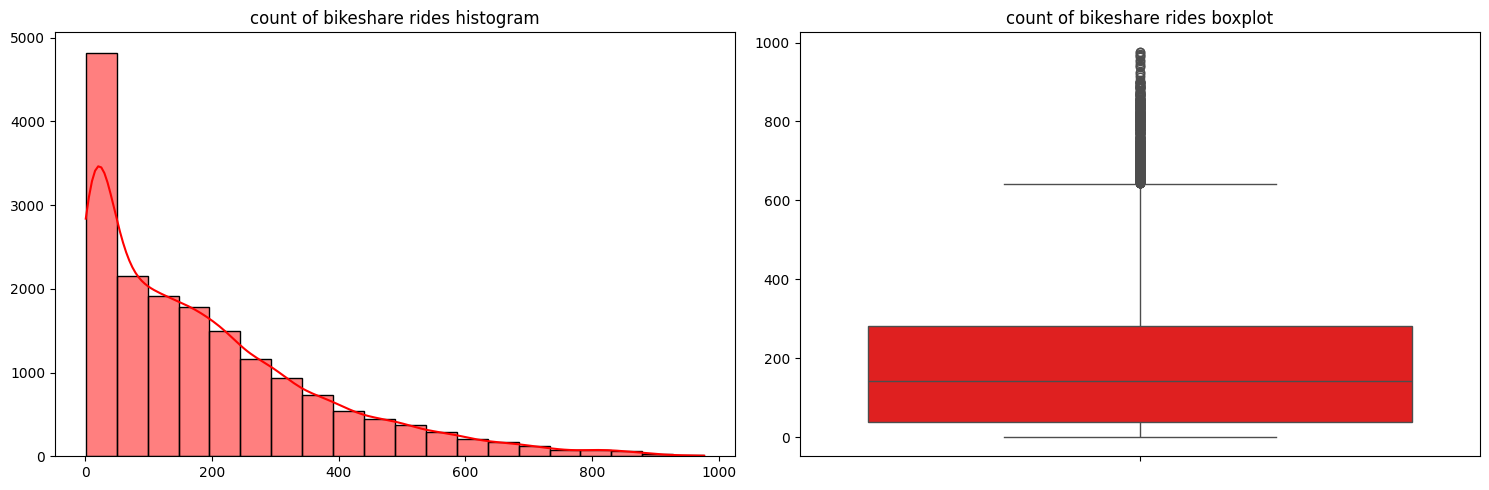

In [40]:
# Membuat figure dengan 2 subplot dalam satu baris
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histogram jumlah penyewaan sepeda
sns.histplot(df['cnt'], kde=True, bins=20, ax = axs[0], color='red')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

# Boxplot jumlah penyewaan sepeda
sns.boxplot(y=df['cnt'], ax = axs[1], color='red')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")



plt.tight_layout()


plt.show()

<ipython-input-41-4b3aaaab2525>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])


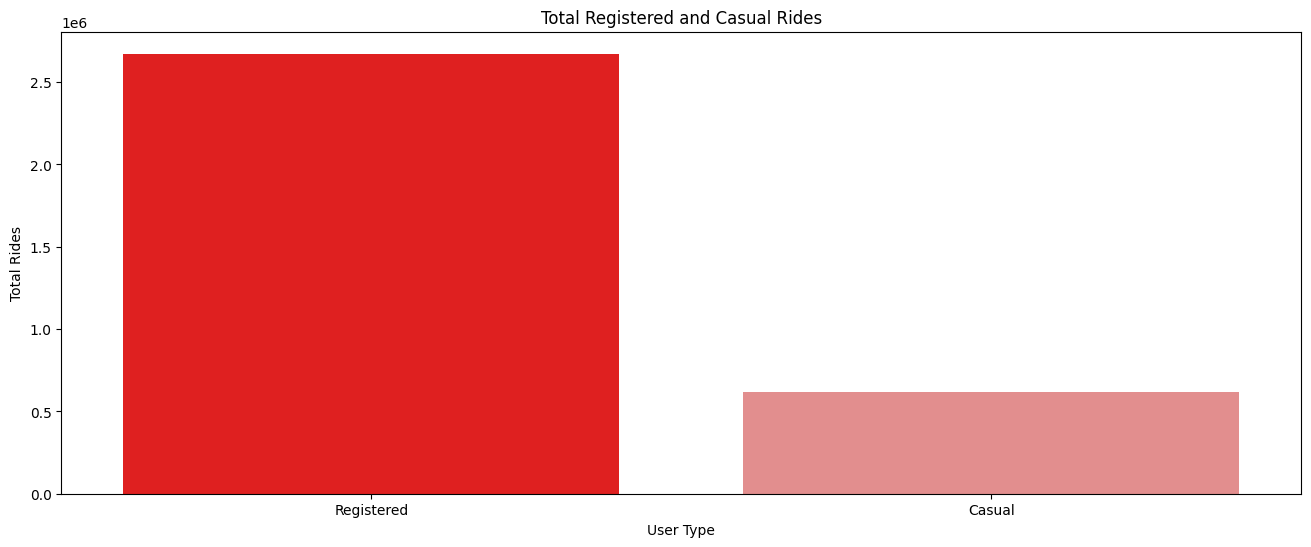

Count of registered users: 2672662
Count of casual users: 620017


In [41]:
# Menghitung total pengguna terdaftar dan pengguna kasual
registered_sum = df['registered'].sum()
casual_sum = df['casual'].sum()

plt.figure(figsize=(16,6))

# Membuat bar chart dengan palet warna yang lebih kontras
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])

# Menambahkan nilai di atas batan
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")


plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

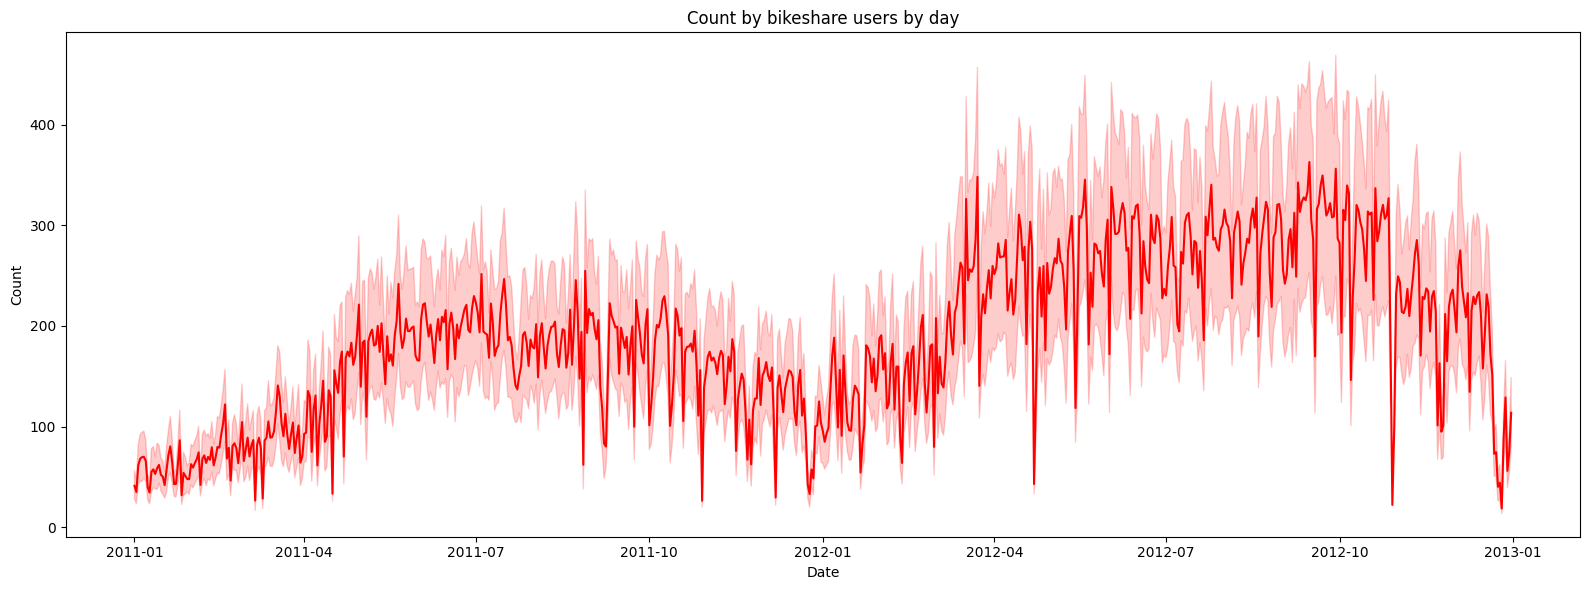

In [42]:
plt.figure(figsize=(16,6))

# Membuat plot garis jumlah penyewaan sepeda per hari
sns.lineplot(x="dteday", y="cnt", data=df, color='red')

# Menambahkan label dan judul
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

plt.tight_layout()
plt.show()

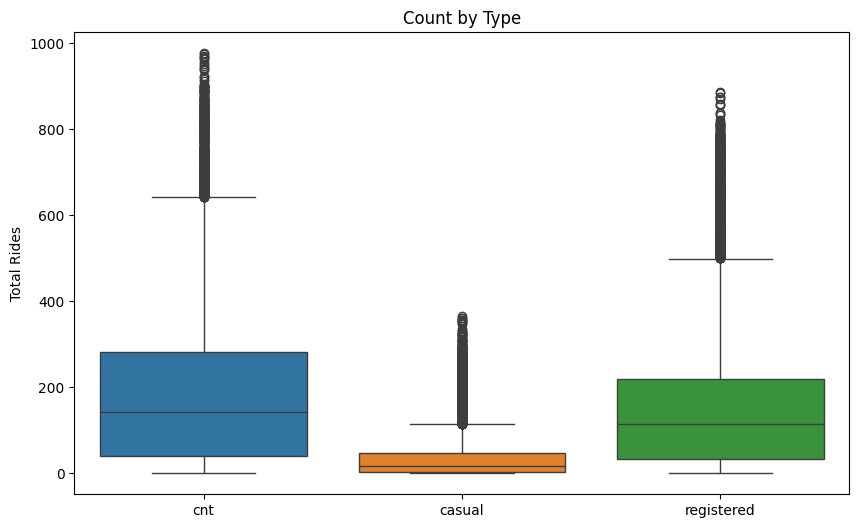

In [43]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df[['cnt', 'casual', 'registered']])

# Menambahkan judul dan label
plt.ylabel("Total Rides")
plt.title("Count by Type")

# Show the plot
plt.show()

<ipython-input-45-c370b5eb5298>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


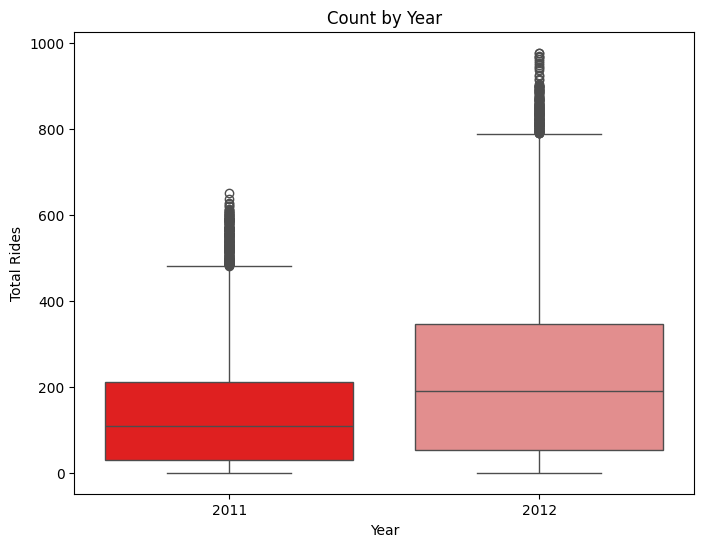

In [45]:
plt.figure(figsize=(8,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="yr",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Menambahkan judul dan label
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")


plt.show()

<ipython-input-46-e62b71070461>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-46-e62b71070461>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


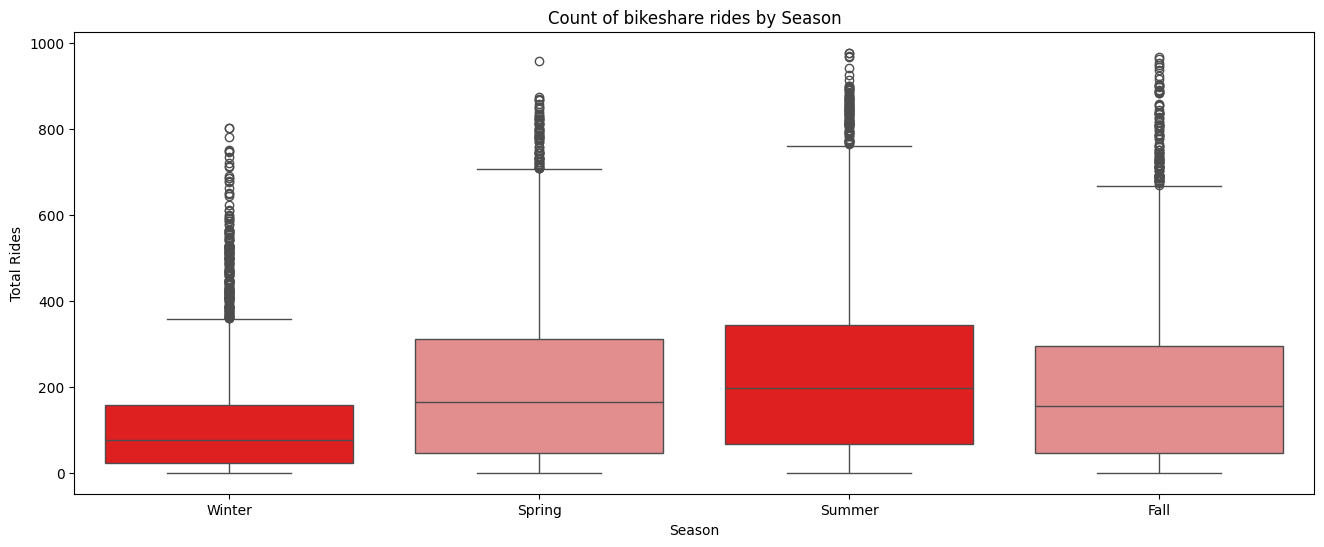

In [46]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="season",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Menambahkan judul dan label
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")


plt.show()

<ipython-input-47-bf8be4a0dfac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-47-bf8be4a0dfac>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


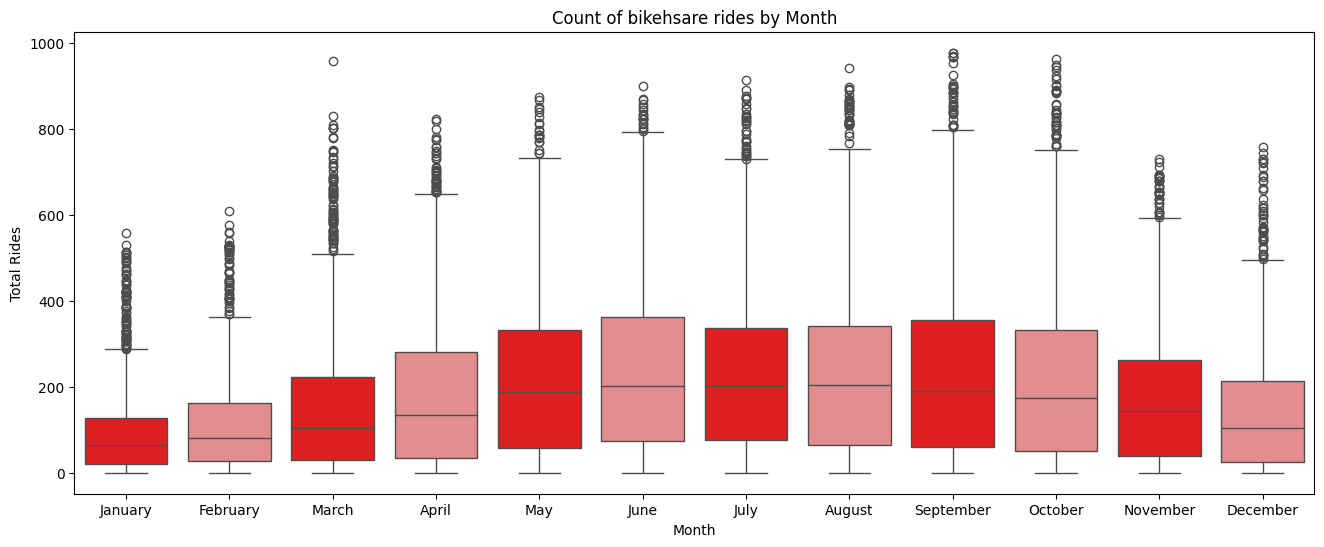

In [47]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="mnth",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Menambahkan judul dan label
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")


plt.show()

In [48]:
# order harian
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<ipython-input-49-c06e583ac925>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-49-c06e583ac925>:4: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


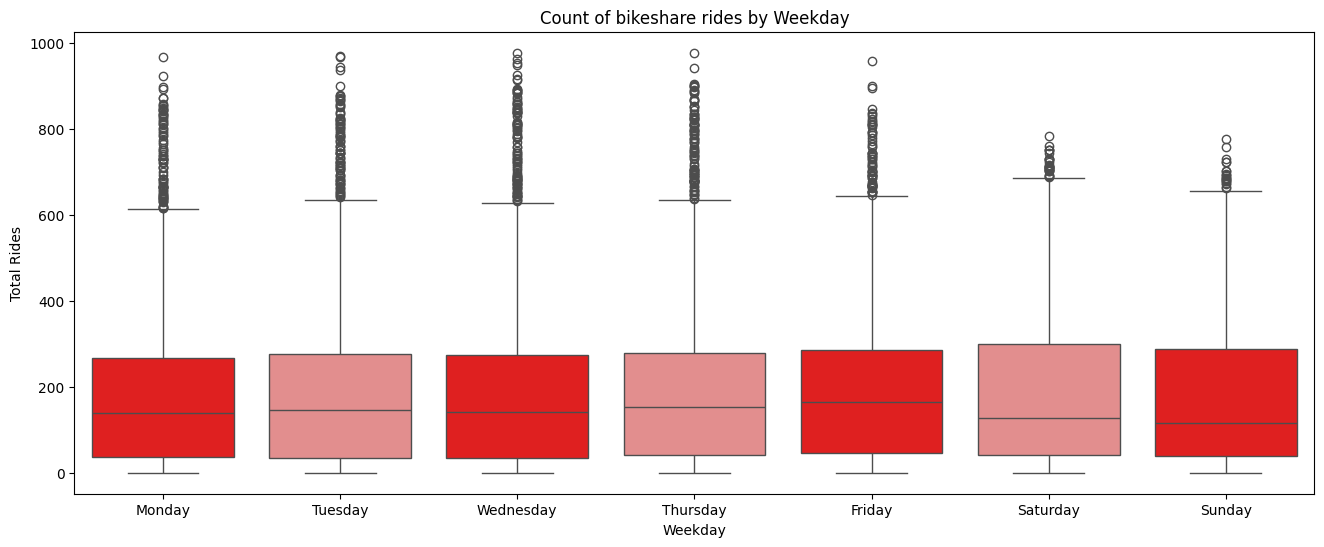

In [49]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="weekday",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"],
    order=day_order
)

# Menambahkan judul dan label
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

<ipython-input-50-164a70aeadbe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-50-164a70aeadbe>:4: UserWarning: 
The palette list has fewer values (2) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


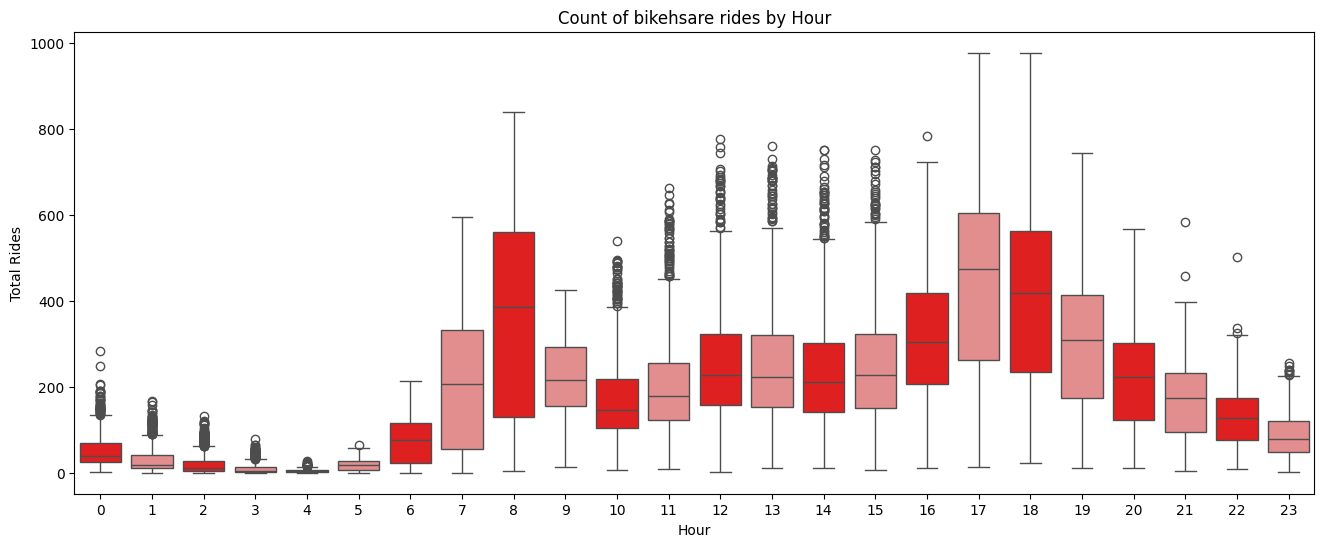

In [50]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="hr",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Menambahkan judul dan label
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

plt.show()

<ipython-input-51-1bb00e84bbd5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


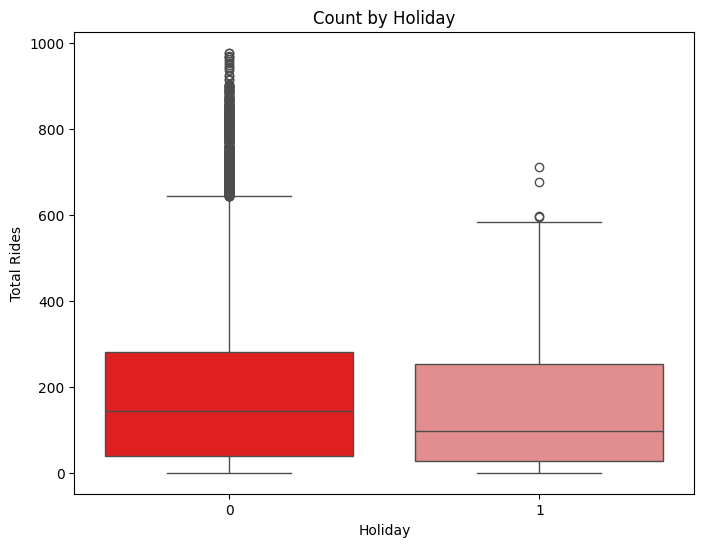

Count of bikeshare users based on holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


In [51]:
plt.figure(figsize=(8,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="holiday",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Menambahkan judul dan label
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count by Holiday")

plt.show()

print('Count of bikeshare users based on holiday:')
print(df['holiday'].value_counts())

<ipython-input-52-5012853263f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


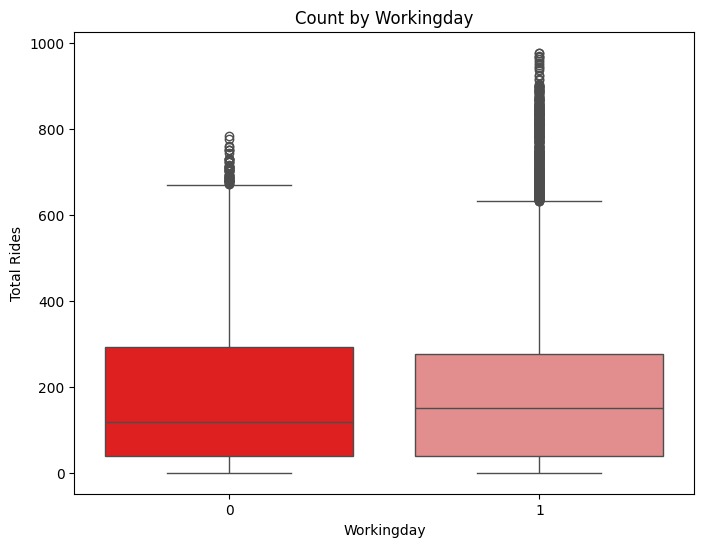

Count of bikeshare users based on working day:
workingday
1    11865
0     5514
Name: count, dtype: int64


In [52]:
plt.figure(figsize=(8,6))

# Membuat boxplot menggunakan sns.boxplot()
sns.boxplot(
    x="workingday",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Menambahkan judul dan label
plt.xlabel("Workingday")
plt.ylabel("Total Rides")
plt.title("Count by Workingday")


plt.show()

print('Count of bikeshare users based on working day:')
print(df['workingday'].value_counts())

In [54]:
# ekstrak variabel untuk scatterplot
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]

df_scatter.head()

,cnt,temp,atemp,hum,windspeed
0,16,403.44,719.75,8100.0,0.0
1,40,369.82,681.75,8000.0,0.0
2,32,369.82,681.75,8000.0,0.0
3,13,403.44,719.75,7500.0,0.0
4,1,403.44,719.75,7500.0,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

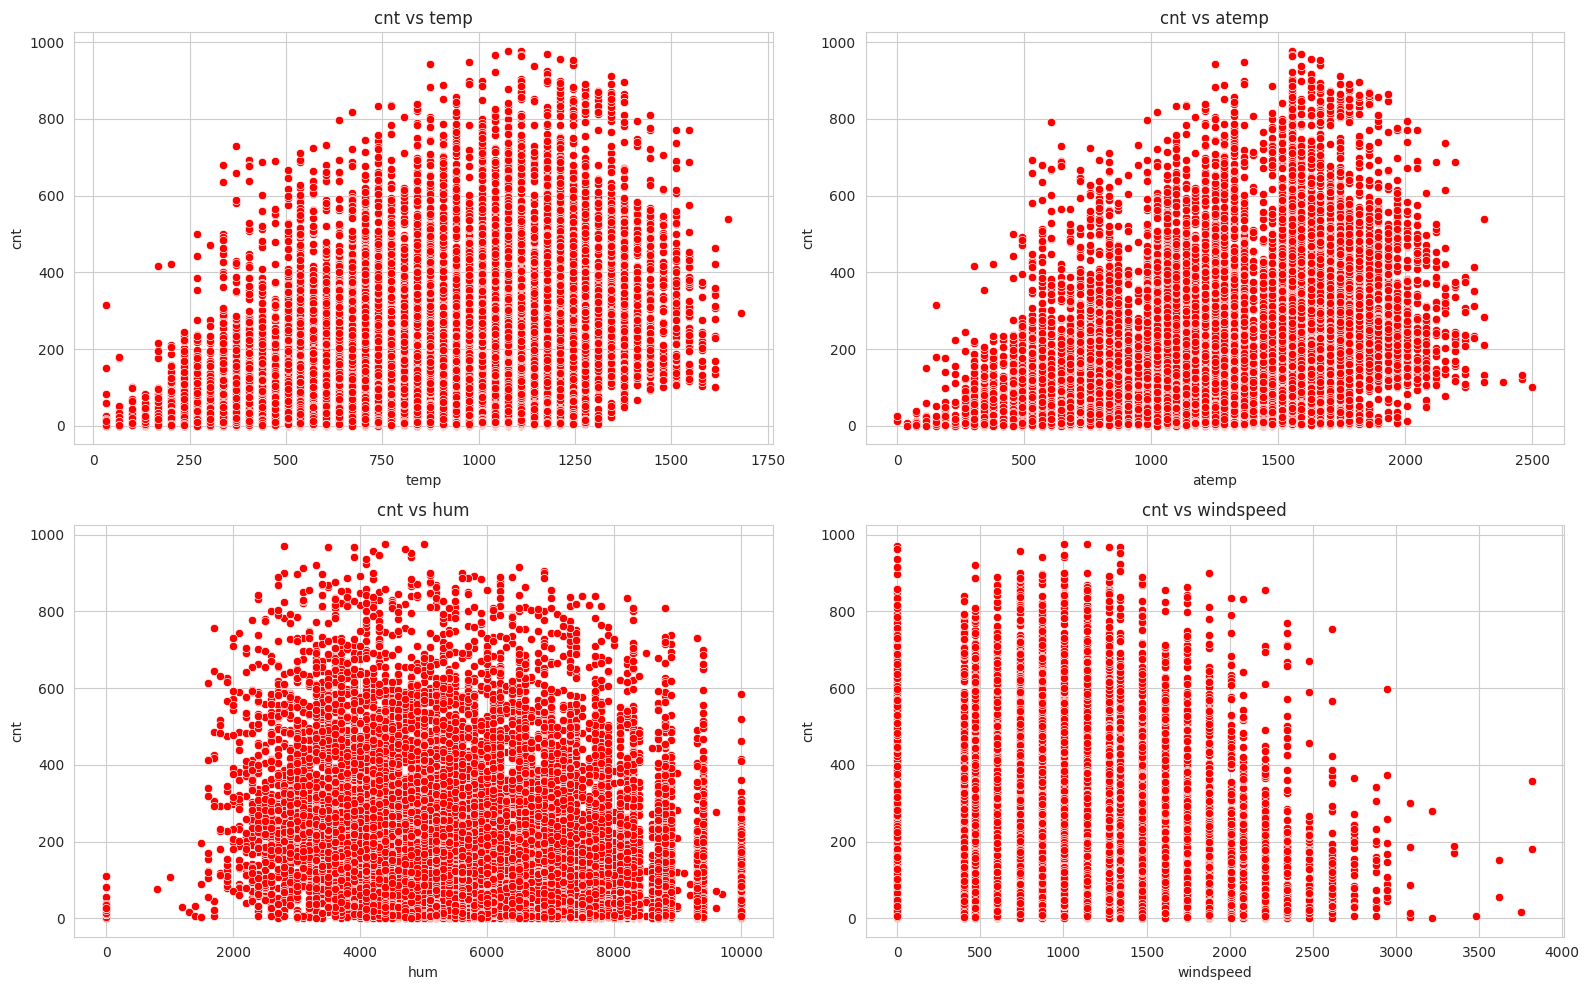

In [58]:
# Membuat figure dengan 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Variabel yang akan diplot (diambil dari index 10-13)
for i, col in enumerate(df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=df, ax=axs[i // 2, i % 2], color='red')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# Menyesuaikan tata letak subplot agar tidak saling tumpang tindih
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
# Menghitung korelasi antara variabel numerik dalam DataFrame pandas
df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<Axes: >

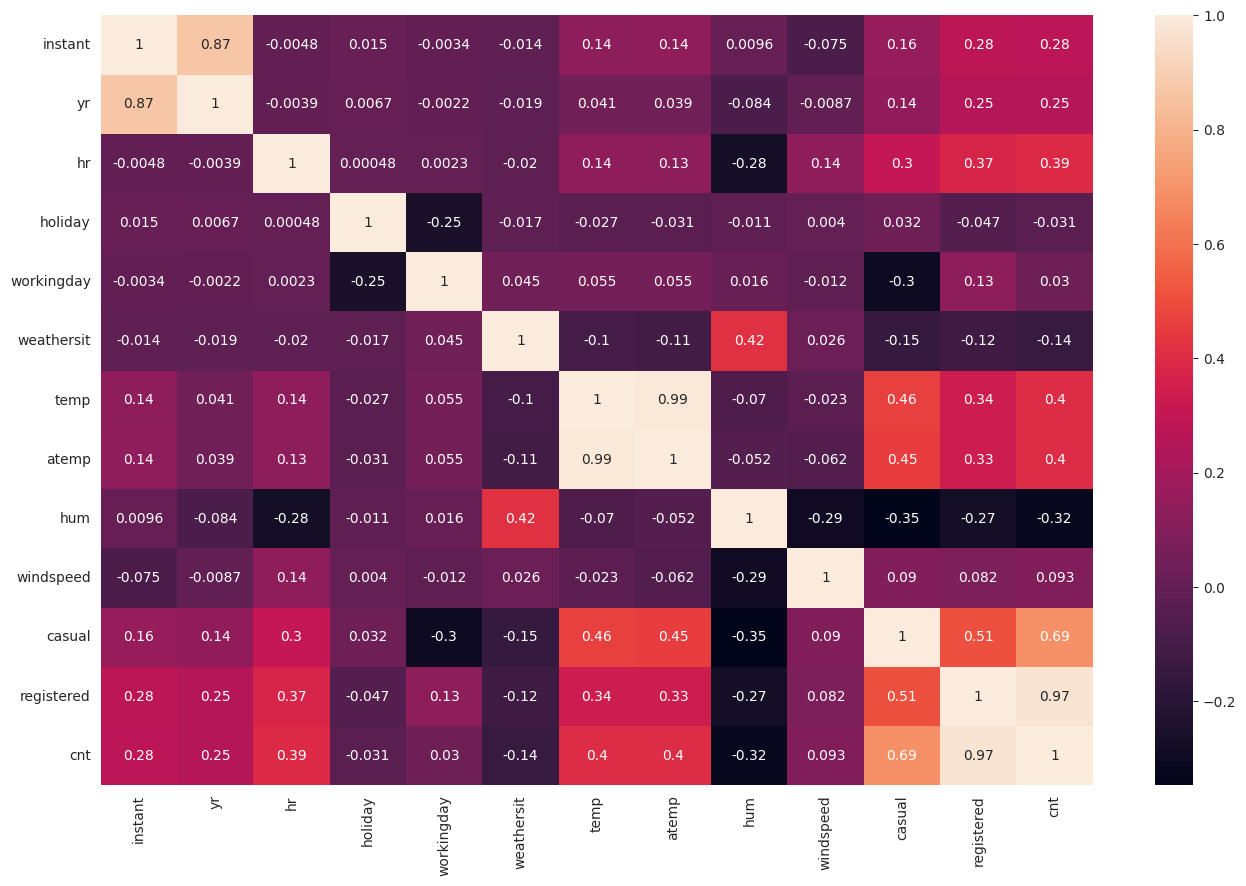

In [61]:
# Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

- Bagaimana tren jumlah perjalanan bike-sharing dalam beberapa tahun terakhir?
- Bagaimana pola penggunaan bike-sharing berdasarkan waktu dalam sehari?
- Musim apa yang memiliki jumlah perjalanan bike-sharing tertinggi?
- Bagaimana pola penggunaan bike-sharing berdasarkan hari dalam seminggu?
- Apakah ada korelasi antara suhu dengan kondisi ketika penggunaan bike-sharing tinggi?
- Apakah cuaca memengaruhi penggunaan bike-sharing?

### Pertanyaan 1:

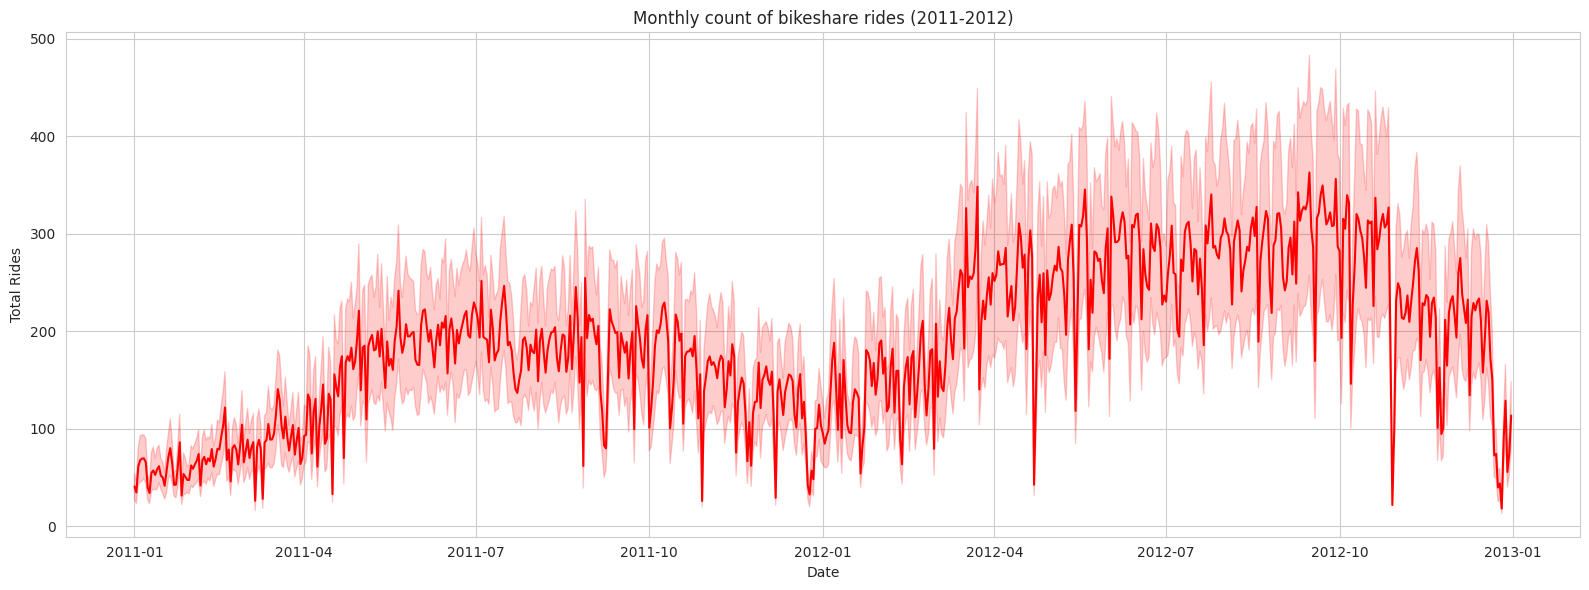

In [62]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

In [64]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head()

<ipython-input-64-d19e218769ea>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_users_df = df.resample(rule='M', on='dteday').agg({


,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [73]:
monthly_users_df.index = pd.to_datetime(monthly_users_df.index, format='%b-%y', errors='coerce')

In [74]:
monthly_users_df.head()

,casual,registered,cnt
dteday,,,
2011-01-01,3073,35116,38189
2011-02-01,6242,41973,48215
2011-03-01,12826,51219,64045
2011-04-01,22346,72524,94870
2011-05-01,31050,104771,135821


In [75]:
monthly_users_df = monthly_users_df.reset_index()
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,2011-01-01,3073,35116,38189
1,2011-02-01,6242,41973,48215
2,2011-03-01,12826,51219,64045
3,2011-04-01,22346,72524,94870
4,2011-05-01,31050,104771,135821


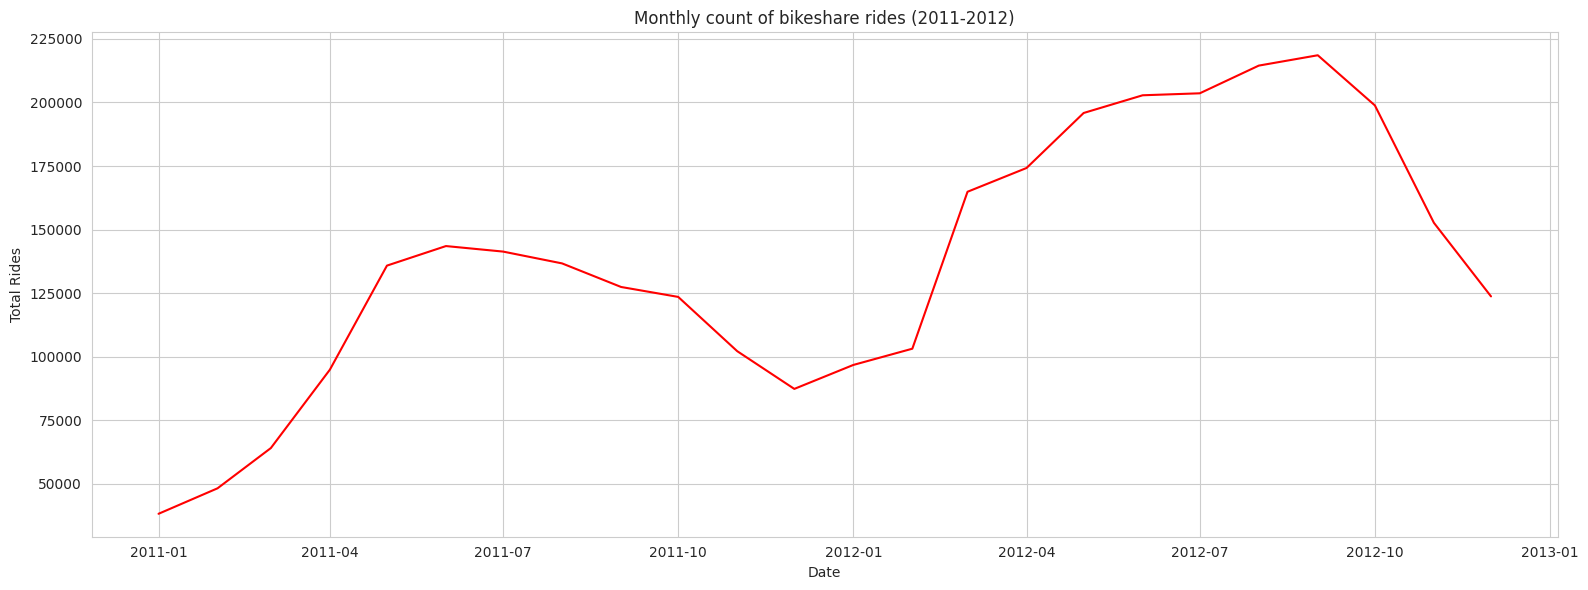

In [77]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

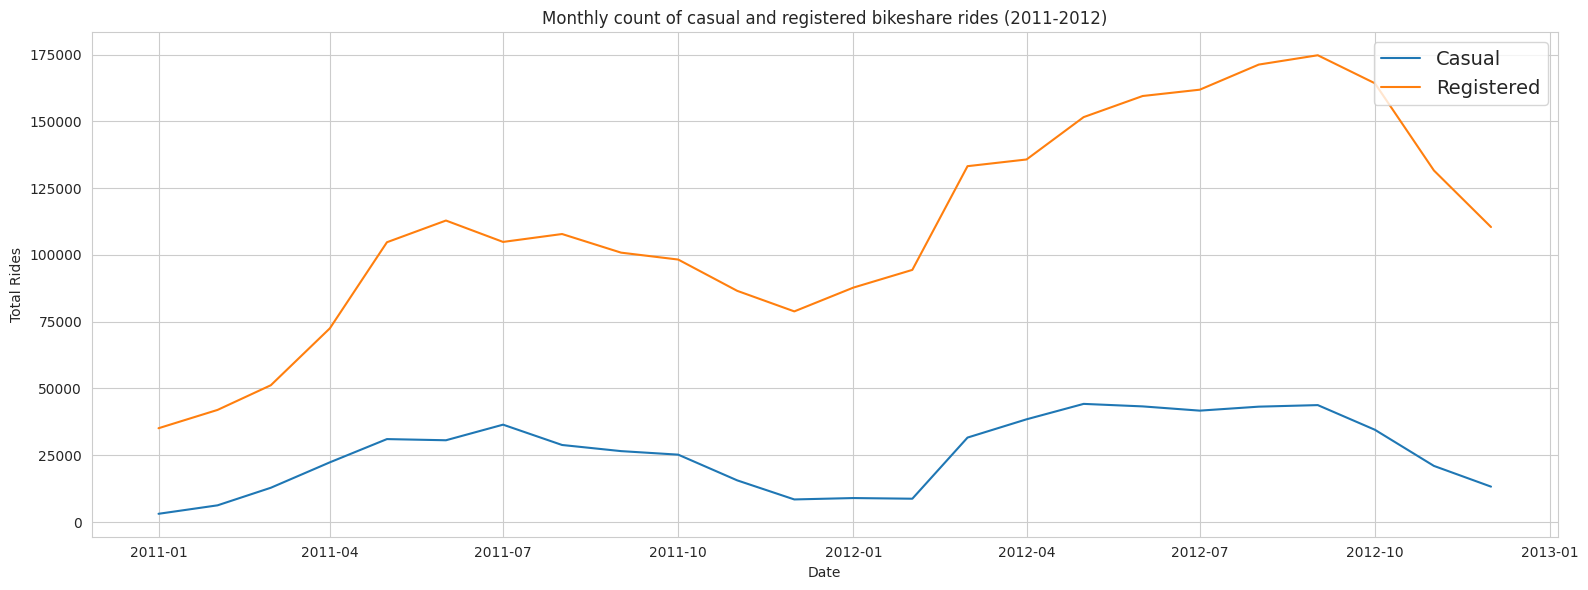

In [78]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Insight

- **Jumlah perjalanan bike-sharing pada tahun 2012 lebih tinggi dibandingkan tahun 2011.**  
- Terlihat adanya **pola musiman (seasonality) yang konsisten** dalam kedua tahun tersebut:  
  - **Awal tahun (Q1):** Jumlah perjalanan **rendah**.  
  - **Kuartal kedua (Q2):** Jumlah perjalanan mulai **meningkat**.  
  - **Kuartal keempat (Q4):** Jumlah perjalanan mulai **menurun**.  
- **Pengguna terdaftar memiliki jumlah perjalanan lebih tinggi dibandingkan pengguna kasual**, meskipun keduanya menunjukkan pola tren yang serupa sepanjang tahun.  


### Pertanyaan 2:

In [79]:
hourly_users_df = df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [80]:
hourly_users_df = hourly_users_df.reset_index()
hourly_users_df.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


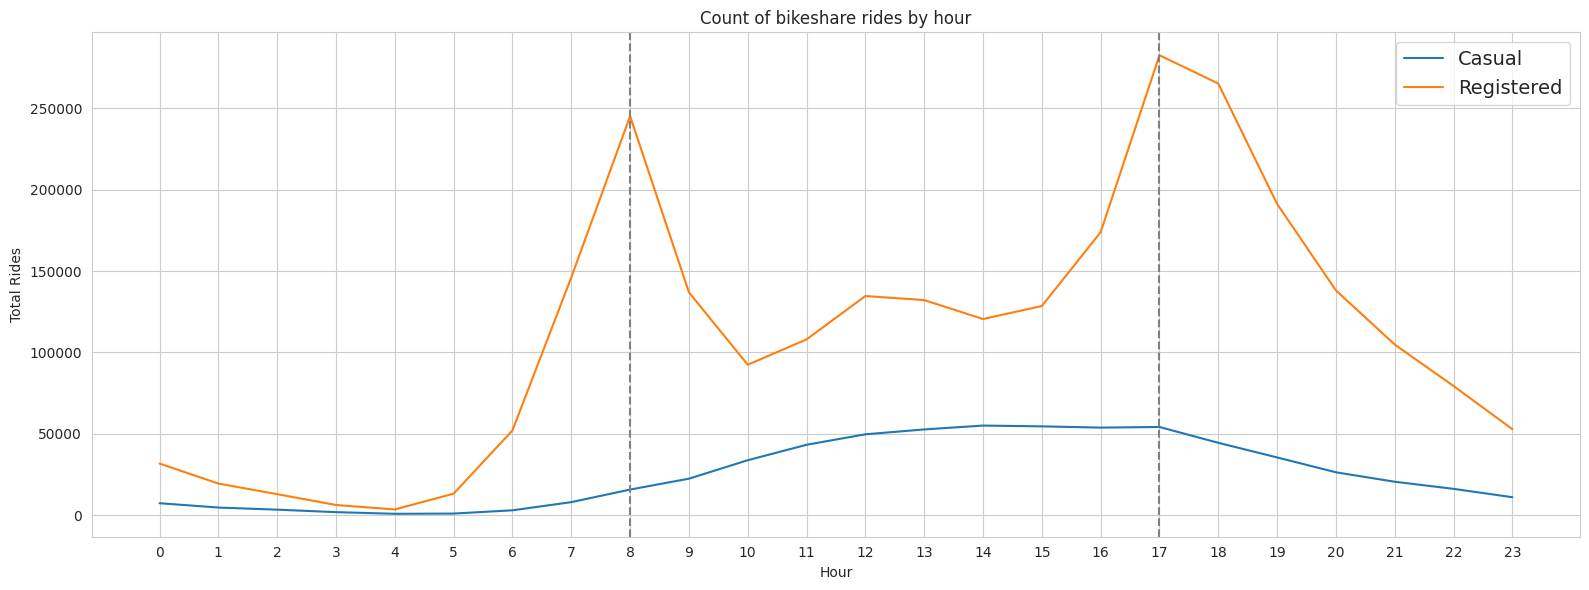

In [81]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Insight

Grafik di atas menunjukkan perbedaan pola yang sangat jelas antara **pengguna kasual** dan **pengguna terdaftar** dalam penggunaan **bike-sharing berdasarkan jam dalam sehari**.

- **Pengguna terdaftar** menunjukkan **puncak penggunaan pada pukul 08.00 dan 17.00.**  
  - Kedua waktu ini bertepatan dengan **jam berangkat dan pulang kerja.**  
  - Ini menunjukkan bahwa pengguna terdaftar kemungkinan besar **menggunakan sepeda untuk perjalanan kerja.**  

- **Pengguna kasual** memiliki pola yang berbeda:  
  - **Frekuensi penggunaan lebih tinggi sepanjang siang hari.**  
  - Setelah **pukul 17.00, penggunaan mulai menurun.**  
  - Hal ini menunjukkan bahwa pengguna kasual lebih banyak **menggunakan sepeda untuk rekreasi atau aktivitas santai.**  


### Pertanyaan 3:

In [83]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [84]:
seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


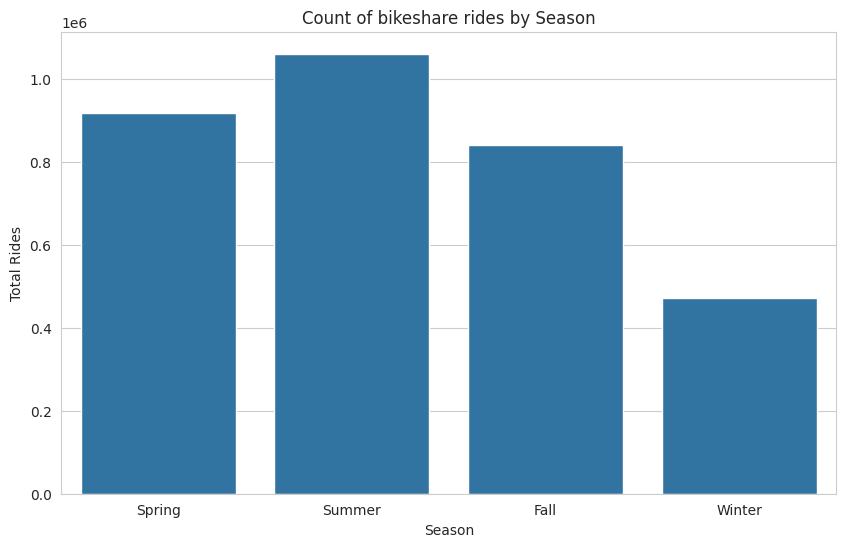

In [85]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

In [86]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
seasonly_users_df_unpivoted

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


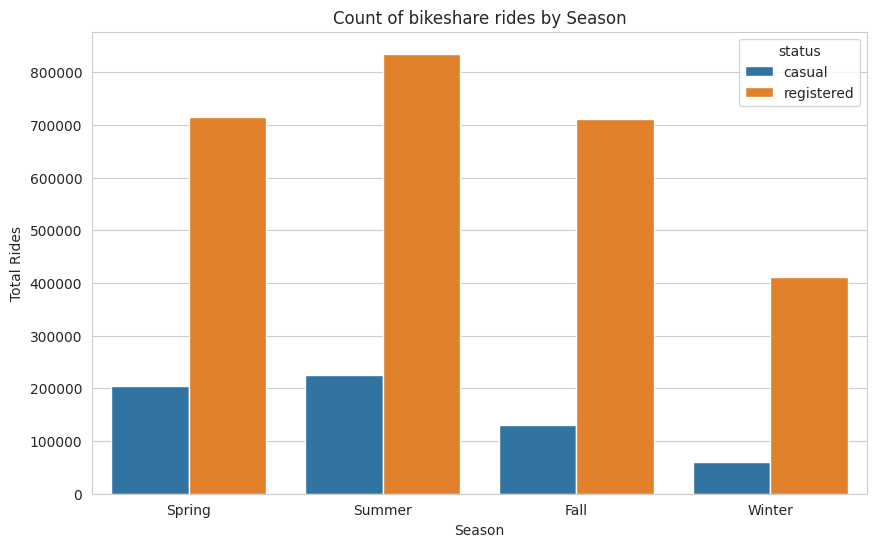

In [87]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

## Insight

Jumlah perjalanan **bike-sharing** mencapai **puncaknya selama musim panas (Summer)** dan **terendah selama musim dingin (Winter).**  

Tidak ada perbedaan pola yang signifikan antara **pengguna kasual** dan **pengguna terdaftar** dalam hal musim.  
Keduanya menunjukkan tren yang sama:  
- **Paling banyak digunakan saat musim panas.**  
- **Paling sedikit digunakan saat musim dingin.**  


### Pertanyaan 4:

In [89]:
weekday_users_df = df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


In [90]:
weekday_users_df = weekday_users_df.reset_index()
weekday_users_df

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


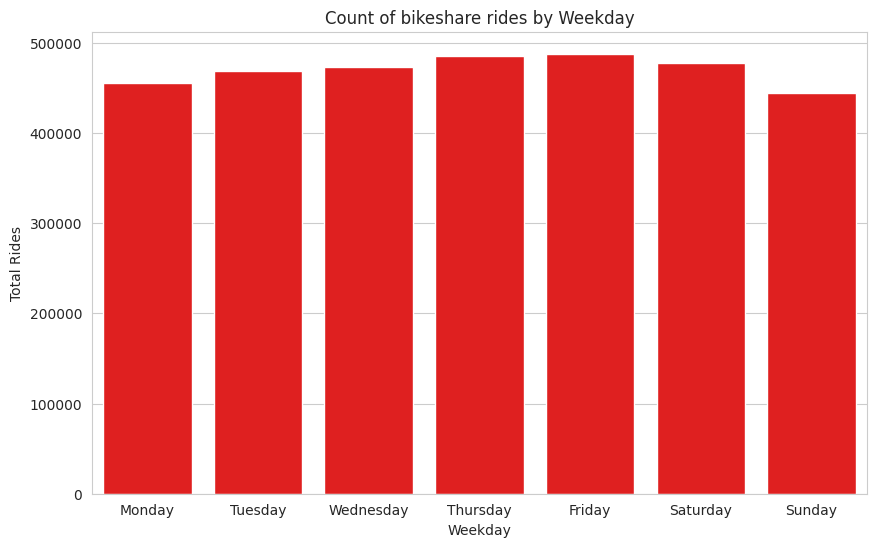

In [91]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='red')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

In [92]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
weekday_users_df_unpivoted

,weekday,status,count
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


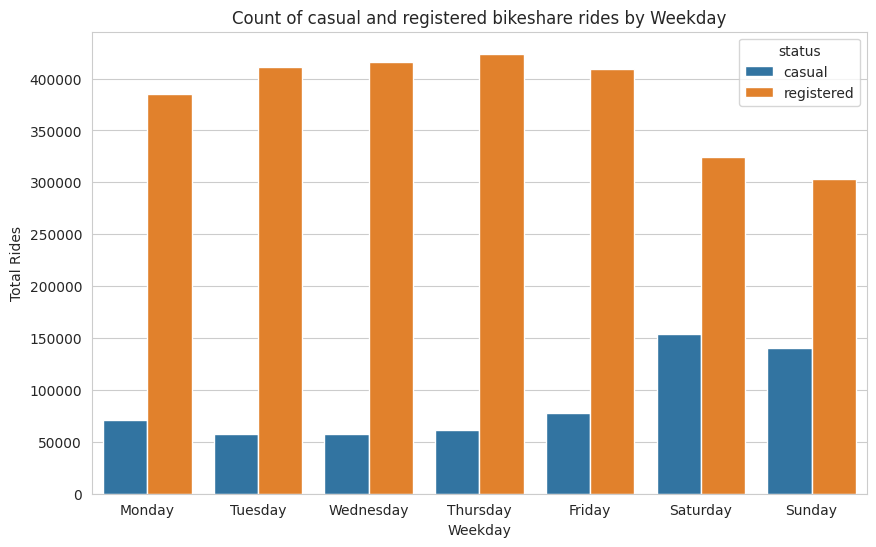

In [93]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

## Insight

Ketika kita **memisahkan jumlah perjalanan bike-sharing** antara **pengguna kasual** dan **pengguna terdaftar**, muncul pola yang menarik:

- **Jumlah perjalanan pengguna kasual lebih tinggi pada akhir pekan (weekend).**  
- **Jumlah perjalanan pengguna terdaftar lebih tinggi pada hari kerja (weekday).**  

Jika dikaitkan dengan **pola penggunaan berdasarkan waktu dalam sehari**, ini semakin memperkuat bahwa:  
- **Pengguna terdaftar kemungkinan besar menggunakan sepeda untuk bekerja secara rutin pada hari kerja.**  
- **Pengguna kasual lebih cenderung menggunakan sepeda untuk aktivitas santai di akhir pekan.**  


### Pertanyaan 5:

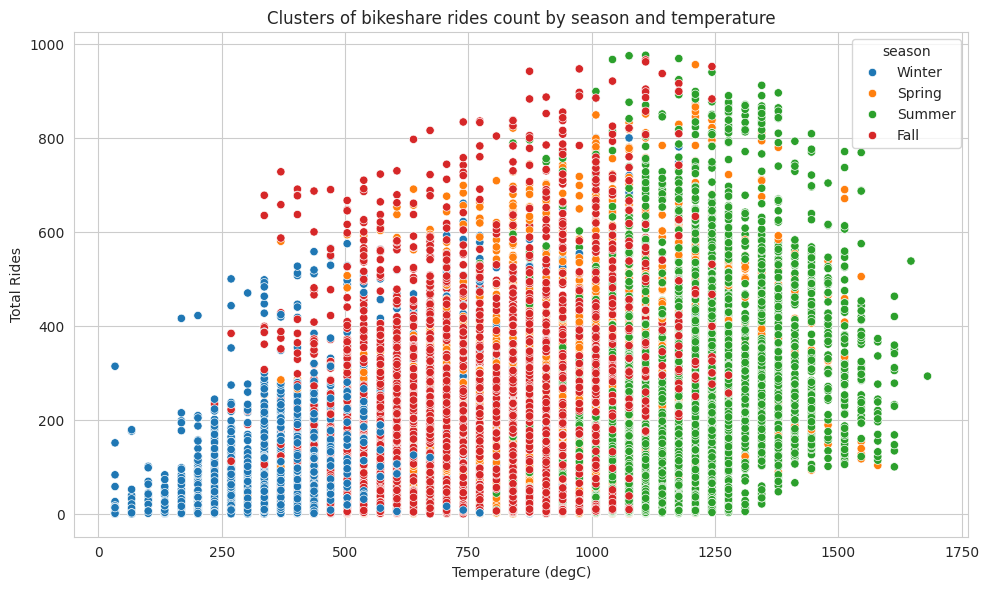

In [95]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

## Insight
1. Pada grafik di atas, ketika suhu lebih rendah, jumlah perjalanan bike-sharing juga rendah. Hal ini terjadi selama musim dingin.
2. Saat suhu meningkat, jumlah perjalanan bike-sharing juga meningkat. Ini terjadi selama musim panas.
3. Namun, tampaknya ada "sweet-spot" suhu di mana jumlah perjalanan bike-sharing paling tinggi. Hal ini terlihat pada kluster musim gugur dan musim panas.
4. "Sweet-spot" suhu tersebut berada di kisaran 20°C hingga 30°C.
Pada hari-hari dengan suhu tersebut, kita dapat mengharapkan jumlah perjalanan bike-sharing akan tinggi.

### Pertanyaan 6:

In [96]:
weatherly_users_df = df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weatherly_users_df

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [97]:
weatherly_users_df = weatherly_users_df.reset_index()
weatherly_users_df

,weathersit,casual,registered,cnt
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


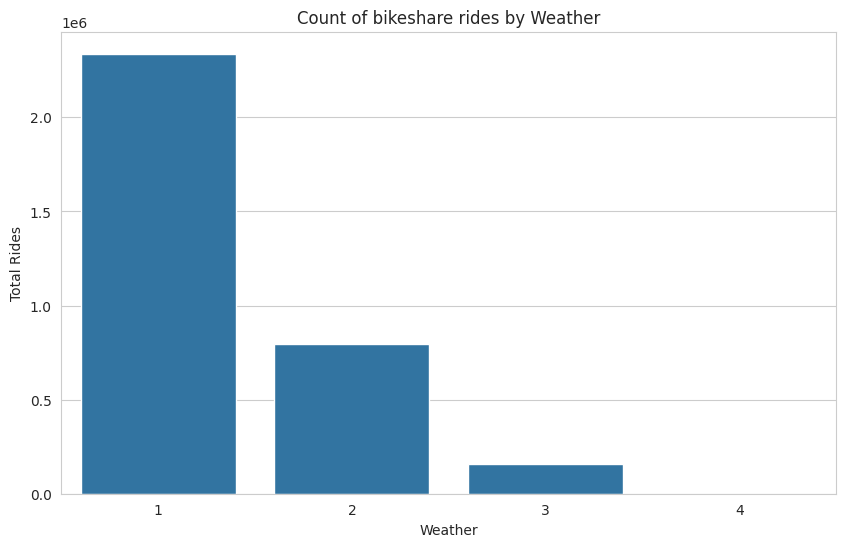

In [98]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weather")

plt.show()

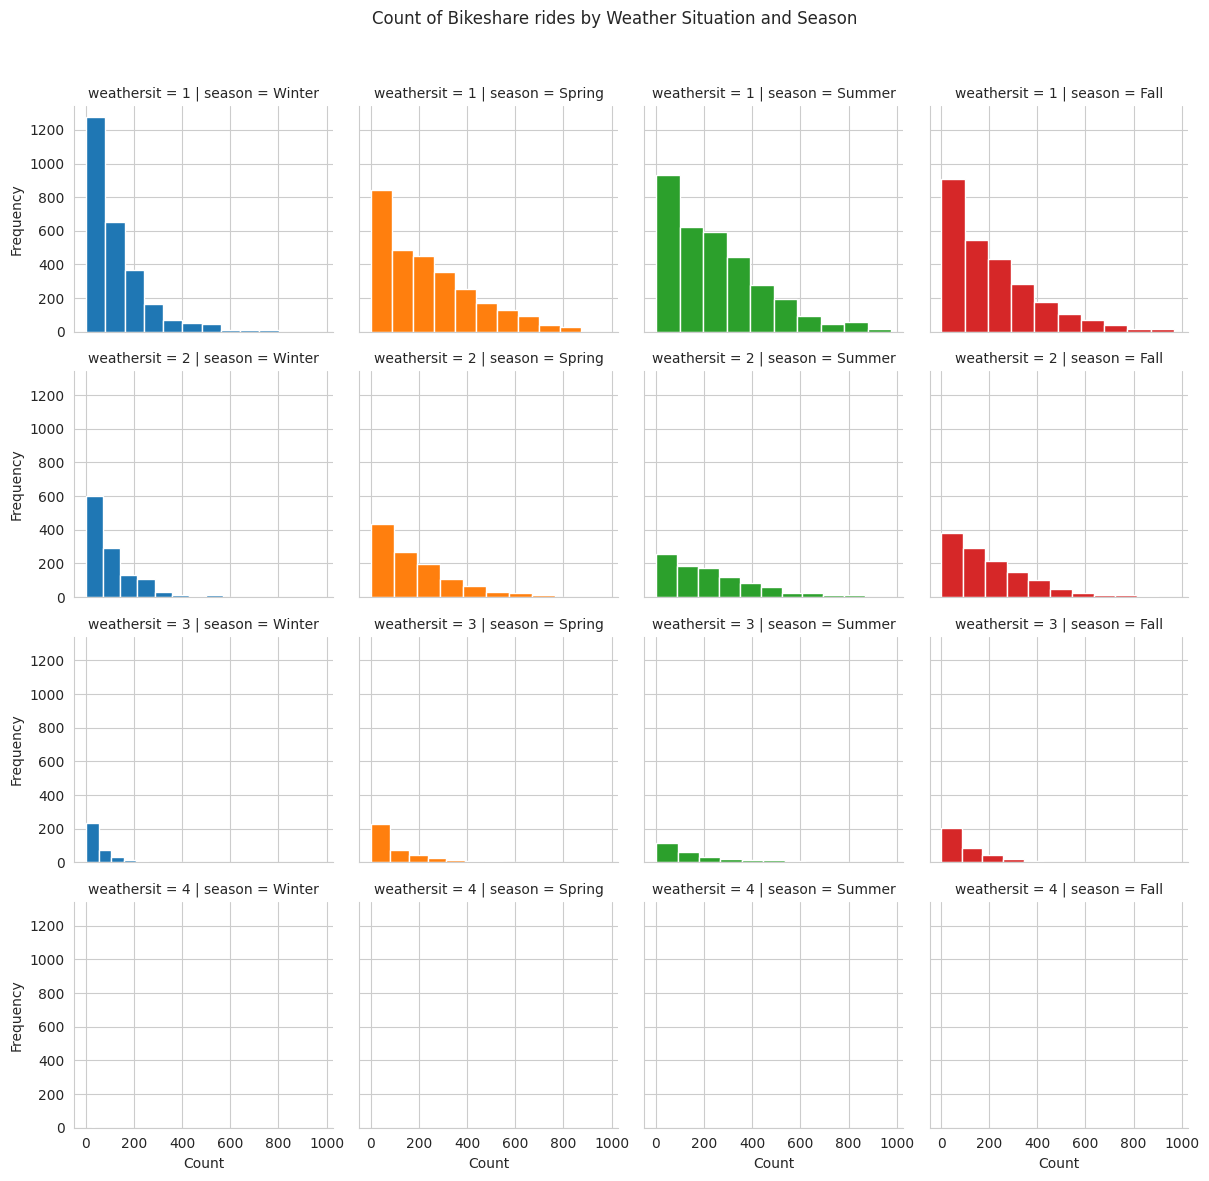

In [99]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=df,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Bikeshare rides by Weather Situation and Season')

g.set_xlabels('Count')
g.set_ylabels('Frequency')

plt.show()

**Insight:**

1. Jumlah penggunaan bike-sharing sangat dipengaruhi oleh kondisi cuaca.
2. Jumlah perjalanan berkurang secara signifikan saat hujan lebat dan badai petir dibandingkan dengan cuaca yang lebih cerah.
3. Kondisi ini berlaku untuk semua musim.

## Conclusion

## 1. Bagaimana tren jumlah perjalanan bike-sharing dalam beberapa tahun terakhir?
Jumlah perjalanan bike-sharing pada tahun **2012 lebih tinggi** dibandingkan tahun **2011**.  
Kedua tahun menunjukkan **tren dan pola musiman yang sama**, yaitu jumlah perjalanan **meningkat di pertengahan tahun** dan **menurun di awal dan akhir tahun**.

## 2. Bagaimana pola penggunaan bike-sharing berdasarkan waktu dalam sehari?
- **Pengguna terdaftar:** Jumlah perjalanan memuncak pada **pukul 08:00 pagi dan 17:00 sore**, menunjukkan bahwa mereka kemungkinan menggunakan sepeda untuk **perjalanan kerja (commuting)**.  
- **Pengguna kasual:** Jumlah perjalanan **mulai meningkat di siang hari** dan **menurun pada malam hari**.

## 3. Musim apa yang memiliki jumlah perjalanan bike-sharing tertinggi?
Jumlah perjalanan **terbanyak terjadi pada musim panas (summer)** dan **paling sedikit pada musim dingin (winter)**.

## 4. Bagaimana pola penggunaan bike-sharing berdasarkan hari dalam seminggu?
- **Pengguna terdaftar:** Lebih banyak melakukan perjalanan pada **hari kerja**. Ini sesuai dengan pola sebelumnya, yang menunjukkan bahwa mereka **menggunakan sepeda untuk keperluan kerja**.  
- **Pengguna kasual:** Lebih banyak melakukan perjalanan pada **akhir pekan**, menunjukkan bahwa mereka menggunakan sepeda untuk **kegiatan rekreasi**.

## 5. Apakah ada korelasi antara suhu dengan jumlah perjalanan bike-sharing?
- Ya, terdapat **korelasi sedang** antara suhu dengan jumlah perjalanan bike-sharing.  
- Jumlah perjalanan **terendah saat suhu dingin (musim dingin)** dan mulai **meningkat seiring kenaikan suhu (musim panas)**.  
- Namun, terdapat **"sweet spot" suhu**, yaitu antara **20°C hingga 30°C**, di mana jumlah perjalanan **paling tinggi**.  
- Suhu ini biasanya terjadi pada **musim panas dan musim gugur (fall)**. Pada hari-hari dengan suhu ini, jumlah perjalanan bike-sharing cenderung tinggi.

## 6. Apakah cuaca memengaruhi penggunaan bike-sharing?
- **Ya**, jumlah perjalanan **jauh lebih tinggi saat cuaca cerah** dibandingkan saat kondisi cuaca ekstrem seperti **hujan deras atau badai**.
